In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, delimiter=';')

## Separating features and target

In [3]:
X = data.drop('quality', axis=1)
y = data['quality'].apply(lambda x: 1 if x >= 6 else 0)  # Convert to binary classification (quality >= 6 is good)

## Splitting the data into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing the features

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cross-Validation
* It is a technique used to assess the performance and generalization ability of a model by partitioning the dataset into multiple subsets or folds. The model is trained on some folds and tested on the remaining fold(s), and this process is repeated multiple times to ensure robust evaluation.

In [6]:
from sklearn.model_selection import cross_val_score

## Logistic Regression model

In [7]:
log_reg = LogisticRegression(max_iter=200)

In [8]:
cv_scores_log_reg = cross_val_score(log_reg, X_train, y_train, cv=5)
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_log_reg.mean():.2f} ± {cv_scores_log_reg.std():.2f}")

Logistic Regression Cross-Validation Accuracy: 0.74 ± 0.04


## Decision Tree model

In [9]:
dt = DecisionTreeClassifier()

In [10]:
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {cv_scores_dt.mean():.2f} ± {cv_scores_dt.std():.2f}")

Decision Tree Cross-Validation Accuracy: 0.74 ± 0.02


# Overfitting
* It occurs when a model learns the details and noise in the training data to the extent that it negatively impacts its performance on new, unseen data. Characteristics of overfitting include high accuracy on training data but poor accuracy on test data, and overly complex models that capture noise instead of underlying patterns.

## Train and evaluate Decision Tree model

In [11]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [14]:
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Test Accuracy: 0.72
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       141
           1       0.76      0.74      0.75       179

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320



### Plotting the confusion matrix

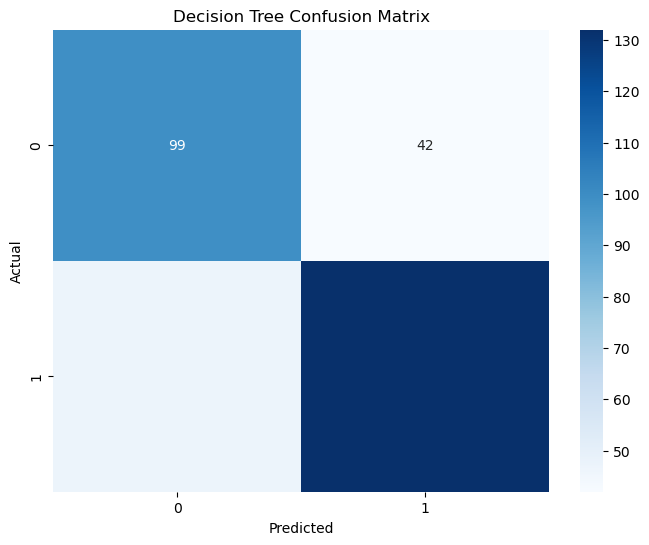

In [13]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Underfitting
* It occurs when a model is too simple to capture the underlying patterns in the data. Characteristics of underfitting include poor accuracy on both training and test data, and models that are too simplistic to learn from the data effectively.

## Train and evaluate Logistic Regression model

In [15]:
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [16]:
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Test Accuracy: 0.74
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



### Plotting the confusion matrix

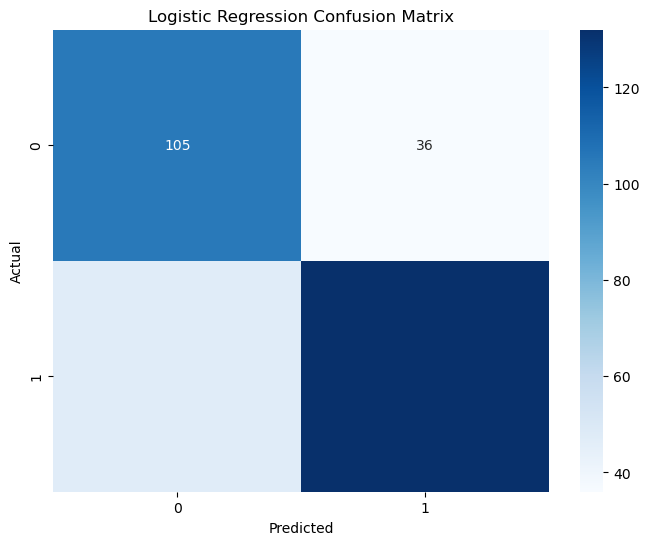

In [17]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()